In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [45]:
# Load the dataset
sales_data = pd.read_csv('sales.csv')

In [46]:
sales_data

,ID,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,category,product_name,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating
0,100,5136486,6/4/2020,230569424,57,M,Western,Zone 3,Express,Athletic Shoes,Structure Shoes,147,10,2,196,Returned,Onsite -Description mismatch,2
1,101,5136457,6/12/2020,230568182,24,F,Western,Zone 3,Standard Delivery,Heels,Serve Shoes,131,4,7,183,Returned,Product - Not fitting expectation,2
2,102,5136465,6/10/2020,230567584,31,M,Weija,Zone 2,Standard Delivery,Sandals,But Shoes,69,6,10,205,Delivered,NaN,3
3,103,5136488,6/5/2020,230563788,62,F,Greater Accra,Zone 1,Express,Sandals,Much Shoes,148,7,7,291,Delivered,NaN,1
4,104,5136449,6/10/2020,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Sneakers,Challenge Shoes,126,12,9,260,Delivered,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112995,113095,5239492,1/20/2015,230468761,48,M,North East,Zone 4,Shipped from Abroad,Athletic Shoes,Include Shoes,61,13,1,171,Delivered,NaN,5
112996,113096,5239493,1/18/2015,230466543,52,M,Ashanti,Zone 3,Shipped from Abroad,Sneakers,Else Shoes,106,7,8,240,Delivered,NaN,4
112997,113097,5239494,1/18/2015,230463891,36,F,Western,Zone 3,Shipped from Abroad,Slippers,Kitchen Shoes,73,10,9,268,Delivered,NaN,4
112998,113098,5239495,1/5/2015,230462947,24,F,Ashanti,Zone 3,Express,Sneakers,Provide Shoes,120,7,1,199,Delivered,NaN,2


In [47]:
# Summary statistics of numerical columns
summary_stats = sales_data.describe()

In [48]:
# Check for missing values
missing_values = sales_data.isnull().sum()

In [49]:
# Convert 'Delivery Date' to datetime format and extract useful components
sales_data['Delivery Date'] = pd.to_datetime(sales_data['Delivery Date'], errors='coerce')
sales_data['Delivery Month'] = sales_data['Delivery Date'].dt.month
sales_data['Delivery Day'] = sales_data['Delivery Date'].dt.day

# Drop non-numeric columns
numeric_data = sales_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      ID   OrderID  CustomerID  Customer Age  Unit Price  \
ID              1.000000  0.998616   -0.001432     -0.003983    0.002781   
OrderID         0.998616  1.000000   -0.001341     -0.003948    0.002816   
CustomerID     -0.001432 -0.001341    1.000000      0.036732   -0.002092   
Customer Age   -0.003983 -0.003948    0.036732      1.000000   -0.008921   
Unit Price      0.002781  0.002816   -0.002092     -0.008921    1.000000   
Shipping Fee    0.003807  0.003932    0.003156      0.002415   -0.003727   
Order Quantity -0.005341 -0.005425    0.000852     -0.002313   -0.002656   
Sale Price      0.001265  0.001643    0.001788      0.001041   -0.003251   
Rating         -0.001759 -0.001906    0.001303      0.001459   -0.004102   

                Shipping Fee  Order Quantity  Sale Price    Rating  
ID                  0.003807       -0.005341    0.001265 -0.001759  
OrderID             0.003932       -0.005425    0.001643 -0.001906  
CustomerID  

In [50]:
print("Summary Statistics:")
display(summary_stats)

print("\nMissing Values:")
print(missing_values)


Summary Statistics:


,ID,OrderID,CustomerID,Customer Age,Unit Price,Shipping Fee,Order Quantity,Sale Price,Rating
count,113000.000000,1.130000e+05,1.130000e+05,113000.000000,113000.000000,113000.000000,113000.000000,113000.000000,113000.000000
mean,56599.500000,5.182996e+06,2.305156e+08,35.919673,99.953345,11.500434,5.334814,224.966566,2.729929
std,32620.434546,3.262052e+04,3.262048e+04,11.021883,29.195219,5.192076,2.924370,43.567035,1.355434
min,100.000000,5.126461e+06,2.304591e+08,17.000000,50.000000,3.000000,1.000000,150.000000,1.000000
25%,28349.750000,5.154747e+06,2.304874e+08,28.000000,75.000000,7.000000,3.000000,187.000000,2.000000
50%,56599.500000,5.182996e+06,2.305156e+08,35.000000,100.000000,12.000000,5.000000,225.000000,3.000000
75%,84849.250000,5.211246e+06,2.305439e+08,43.000000,125.000000,16.000000,8.000000,263.000000,4.000000
max,113099.000000,5.239496e+06,2.305721e+08,87.000000,150.000000,20.000000,10.000000,300.000000,5.000000



Missing Values:
ID                     0
OrderID                0
Delivery Date          0
CustomerID             0
Customer Age           0
Customer Gender        0
Location               0
Zone                   0
Delivery Type          0
category               0
product_name           0
Unit Price             0
Shipping Fee           0
Order Quantity         0
Sale Price             0
Status                 0
Reason             83355
Rating                 0
dtype: int64


Text(0.5, 1.0, 'Distribution of Sale Price')

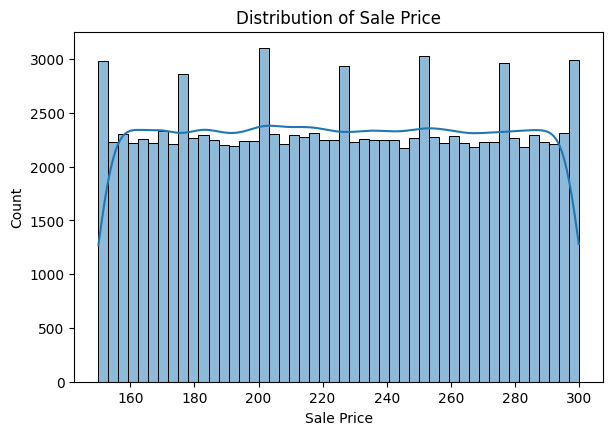

In [51]:
# Visualizing the distribution of Sale Price
plt.figure(figsize=(15, 10))
    
plt.subplot(2, 2, 1)
sns.histplot(sales_data['Sale Price'], kde=True)
plt.title('Distribution of Sale Price')


Text(0.5, 1.0, 'Distribution of Customer Age')

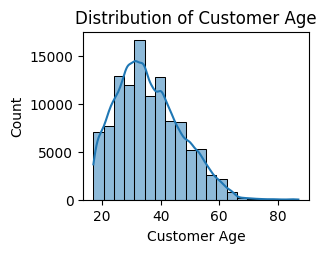

In [52]:
# Visualizing Customer Age distribution
plt.subplot(2, 2, 2)
sns.histplot(sales_data['Customer Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')

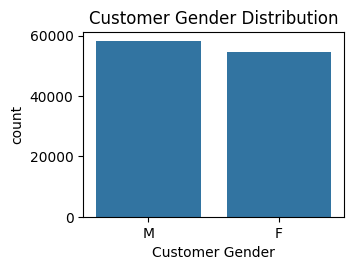

In [53]:
# Bar plot for Customer Gender distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Customer Gender', data=sales_data)
plt.title('Customer Gender Distribution')
plt.tight_layout()
plt.show()

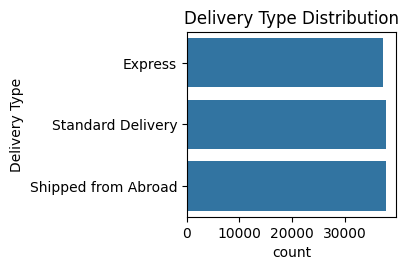

In [54]:
# Bar plot for Delivery Type distribution
plt.subplot(2, 2, 4)
sns.countplot(y='Delivery Type', data=sales_data)
plt.title('Delivery Type Distribution')
plt.tight_layout()
plt.show()

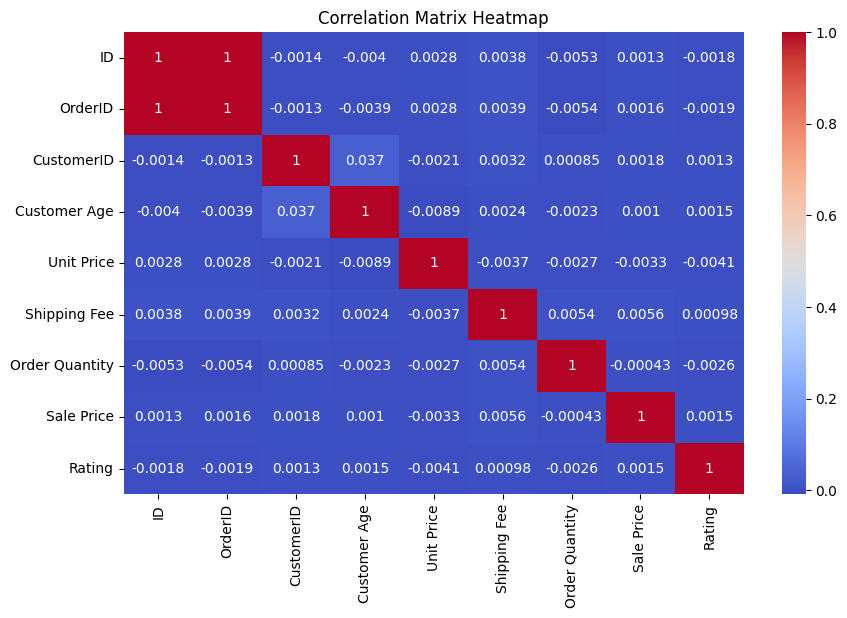

In [55]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [56]:
# Drop irrelevant or empty columns
sales_data = sales_data.drop(columns=['Unnamed: 3', 'Unnamed: 12'], errors='ignore')

In [57]:
sales_data

,ID,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,category,product_name,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,Delivery Month,Delivery Day
0,100,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Athletic Shoes,Structure Shoes,147,10,2,196,Returned,Onsite -Description mismatch,2,6,4
1,101,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Heels,Serve Shoes,131,4,7,183,Returned,Product - Not fitting expectation,2,6,12
2,102,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Sandals,But Shoes,69,6,10,205,Delivered,NaN,3,6,10
3,103,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Sandals,Much Shoes,148,7,7,291,Delivered,NaN,1,6,5
4,104,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Sneakers,Challenge Shoes,126,12,9,260,Delivered,NaN,3,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112995,113095,5239492,2015-01-20,230468761,48,M,North East,Zone 4,Shipped from Abroad,Athletic Shoes,Include Shoes,61,13,1,171,Delivered,NaN,5,1,20
112996,113096,5239493,2015-01-18,230466543,52,M,Ashanti,Zone 3,Shipped from Abroad,Sneakers,Else Shoes,106,7,8,240,Delivered,NaN,4,1,18
112997,113097,5239494,2015-01-18,230463891,36,F,Western,Zone 3,Shipped from Abroad,Slippers,Kitchen Shoes,73,10,9,268,Delivered,NaN,4,1,18
112998,113098,5239495,2015-01-05,230462947,24,F,Ashanti,Zone 3,Express,Sneakers,Provide Shoes,120,7,1,199,Delivered,NaN,2,1,5


In [58]:
# Preprocessing
# Encoding categorical variables: Customer Gender, Location, Delivery Type, Category, Product Name, Status
sales_data = pd.get_dummies(sales_data, columns=['Customer Gender', 'Location', 'Delivery Type', 'category', 'product_name', 'Status'], drop_first=True)

In [59]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_data = sales_data.select_dtypes(include=['float64', 'int64'])
non_numeric_data = sales_data.select_dtypes(exclude=['float64', 'int64'])

# Impute missing values only for numeric data
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Recombine the imputed numeric data with the non-numeric data
sales_data_imputed = pd.concat([numeric_data_imputed, non_numeric_data], axis=1)

# Display the first few rows of the imputed data to verify
print(sales_data_imputed.head())


      ID    OrderID   CustomerID  Customer Age  Unit Price  Shipping Fee  \
0  100.0  5136486.0  230569424.0          57.0       147.0          10.0   
1  101.0  5136457.0  230568182.0          24.0       131.0           4.0   
2  102.0  5136465.0  230567584.0          31.0        69.0           6.0   
3  103.0  5136488.0  230563788.0          62.0       148.0           7.0   
4  104.0  5136449.0  230563726.0          18.0       126.0          12.0   

   Order Quantity  Sale Price  Rating Delivery Date  ...  \
0             2.0       196.0     2.0    2020-06-04  ...   
1             7.0       183.0     2.0    2020-06-12  ...   
2            10.0       205.0     3.0    2020-06-10  ...   
3             7.0       291.0     1.0    2020-06-05  ...   
4             9.0       260.0     3.0    2020-06-10  ...   

  product_name_Word Shoes product_name_Would Shoes  product_name_Writer Shoes  \
0                   False                    False                      False   
1                   

In [60]:
# Define features (X) and target (y)
X = sales_data_imputed.drop(columns=['Sale Price'])  # Exclude Sale Price (our target)
y = sales_data_imputed['Sale Price']


In [61]:
# Convert 'Delivery Date' to datetime format and extract useful features
sales_data['Delivery Date'] = pd.to_datetime(sales_data['Delivery Date'], errors='coerce')
sales_data['Delivery Month'] = sales_data['Delivery Date'].dt.month
sales_data['Delivery Day'] = sales_data['Delivery Date'].dt.day

# Drop non-numeric columns that can't be scaled
non_numeric_columns = ['ID', 'OrderID', 'CustomerID', 'Location', 'Zone', 
                       'category', 'product_name', 'Status', 'Reason', 'Delivery Date']
numeric_data = sales_data.drop(columns=non_numeric_columns, errors='ignore')

# Check if any columns are still non-numeric
print("Data types after dropping non-numeric columns:")
print(numeric_data.dtypes)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# Display the shape of the scaled data
print(f'Scaled data shape: {X_scaled.shape}')


Data types after dropping non-numeric columns:
Customer Age                   int64
Unit Price                     int64
Shipping Fee                   int64
Order Quantity                 int64
Sale Price                     int64
                               ...  
product_name_Year Shoes         bool
product_name_Young Shoes        bool
product_name_Your Shoes         bool
product_name_Yourself Shoes     bool
Status_Returned                 bool
Length: 487, dtype: object
Scaled data shape: (113000, 487)


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [63]:
# Step 7: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
}

In [65]:
# Step 8: Train and evaluate models with additional metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[name] = {'R²': r2, 'MAE': mae}


Model Performance (R² Scores):
Linear Regression: 1.0
Decision Tree: 1.0
Random Forest: 1.0
Gradient Boosting: 0.99998275027249


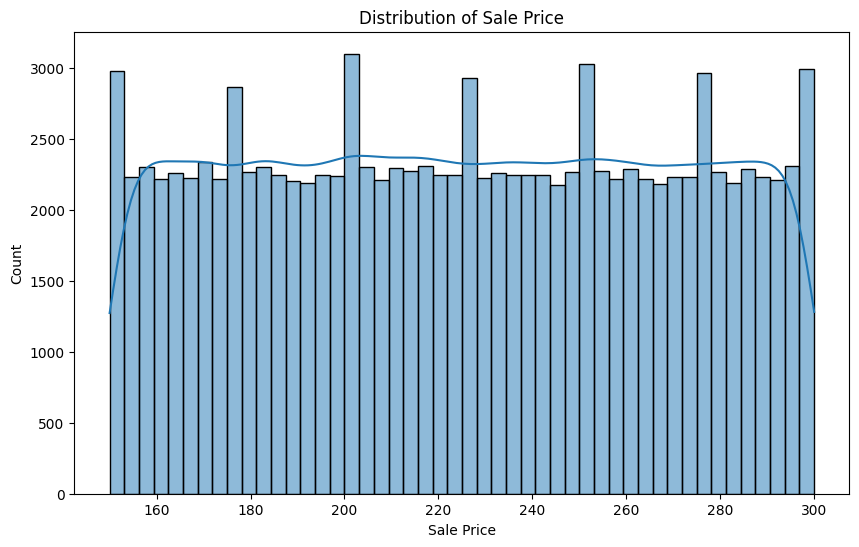

In [66]:
# Step 10: Visualize Sale Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sale Price'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()